# Scott Breitbach
## Project 2: Stroke Prediction
## DSC680, Weeks 5-7
## 05-July-2022

In [ ]:
## Load Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
# balancing data
from imblearn.over_sampling import RandomOverSampler

# Load Data

In [ ]:
# import files to colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_strokes.csv to train_strokes (1).csv
User uploaded file "train_strokes.csv" with length 2635787 bytes


In [ ]:
def load_dataframe(path):
  # load dataset as pandas DataFrame
  DF = pd.read_csv(path, index_col=0)
  return DF

In [ ]:
# load the dataframe
strokeDF = load_dataframe('/content/train_strokes.csv')

In [ ]:
len(strokeDF[strokeDF['age'] <= 30])

14236

In [ ]:
14236/len(strokeDF)

0.3280184331797235

In [ ]:
strokeDF.stroke.sum()

783

In [ ]:
4/783

0.005108556832694764

# Look at data

In [ ]:
# look at dataframe
strokeDF.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
# display object types
strokeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43400 entries, 30669 to 36271
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 4.0+ MB


In [ ]:
# summarize numerical data
strokeDF.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43400.0,42.217894,22.519649,0.08,24.00,44.00,60.00,82.00
hypertension,43400.0,0.093571,0.291235,0.00,0.00,0.00,0.00,1.00
heart_disease,43400.0,0.047512,0.212733,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,43400.0,104.482750,43.111751,55.00,77.54,91.58,112.07,291.05
bmi,41938.0,28.605038,7.770020,10.10,23.20,27.70,32.90,97.60
stroke,43400.0,0.018041,0.133103,0.00,0.00,0.00,0.00,1.00


* Minimum `age` of 0.08 years (1 month) is unlikely to be correct. Will need to look at distribution and establish a cutoff.

* `hypertension` and `heart_disease` appear to already be scaled 0-1, which is probably fine.

* `avg_glucose_level` Note: "A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes." per [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451)

* A minimum `bmi` of [10.10 is not entirely unreasonable](https://www.ennonline.net/fex/15/limits).

In [ ]:
# summarize categorical data
strokeDF.describe(exclude=['float', 'int']).T

,count,unique,top,freq
gender,43400,3,Female,25665
ever_married,43400,2,Yes,27938
work_type,43400,5,Private,24834
Residence_type,43400,2,Urban,21756
smoking_status,30108,3,never smoked,16053


In [ ]:
# show categories for each categorical column
for i in strokeDF.columns:
  if strokeDF[i].dtype == 'O':
    print(f'\n* {i}:')
    print(strokeDF[i].value_counts())


* gender:
Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

* ever_married:
Yes    27938
No     15462
Name: ever_married, dtype: int64

* work_type:
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

* Residence_type:
Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

* smoking_status:
never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64


In [ ]:
# Count null values in each column
strokeDF.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
# how much of the data is Null
num = round(strokeDF.bmi.isna().sum() / len(strokeDF) * 100, 1)
print(f'{num}% of bmi data is Null')

num = round(strokeDF.smoking_status.isna().sum() / len(strokeDF) * 100, 1)
print(f'{num}% of smoking_status data is Null')

3.4% of bmi data is Null
30.6% of smoking_status data is Null


# Clean data

## Impute Null values in `smoking_status` to 'unknown'

In [ ]:
strokeDF.smoking_status.value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [ ]:
# impute null smoking values to class 'unknown'
strokeDF['smoking_status'] = strokeDF['smoking_status'].fillna('unknown')

In [ ]:
round(11/len(strokeDF)*100,2)

0.03

In [ ]:
# testDF = strokeDF.copy()
# testDF.isna().sum()

In [ ]:
# # updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
# testDF['smoking_status'] = testDF['smoking_status'].fillna('unk') #'unknown'

In [ ]:
# testDF.isna().sum()

In [ ]:
# testDF.smoking_status.value_counts()

In [ ]:
# testDF['smoking_status'].replace('never smoked', 'never', inplace=True)
# testDF['smoking_status'].replace('formerly smoked', 'former', inplace=True)
# testDF['smoking_status'].replace('smokes', 'smoker', inplace=True)

In [ ]:
# testDF.smoking_status.value_counts()

## Convert `smoking_status` categories to single word descriptors

In [ ]:
# # swap out to simpler smoking descriptions
# strokeDF['smoking_status'].replace('never smoked', 'never', inplace=True)
# strokeDF['smoking_status'].replace('formerly smoked', 'former', inplace=True)
# strokeDF['smoking_status'].replace('smokes', 'smoker', inplace=True)

...better:

In [ ]:
# swap out to simpler smoking descriptions
strokeDF['smoking_status'].replace(['never smoked', 'formerly smoked', 'smokes'],
                                   ['never', 'former', 'smoker'], inplace=True)

## Impute Null values in `bmi` using LogReg?

In [ ]:
strokeDF.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1462
smoking_status          0
stroke                  0
dtype: int64

In [ ]:
strokeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43400 entries, 30669 to 36271
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     43400 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 4.0+ MB


In [ ]:
df = strokeDF.copy()
# encode Yes/No to 1/0
df.ever_married.replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['gender', 'work_type', 
                       'Residence_type', 'smoking_status']), 
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, 
                              columns=transformer.get_feature_names_out())

In [ ]:
# transformed_df.info()

In [ ]:
# transformed_df.index

In [ ]:
# len(transformed_df)

In [ ]:
# df.index

In [ ]:
# len(df)

In [ ]:
# transformed_df.index = df.index

In [ ]:
# transformed_df.index

In [ ]:
# df = transformed_df.copy()
# z = df.stroke

In [ ]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# # df = strokeDF.copy()
# df.drop('stroke', axis=1, inplace=True)
# # df.head()
# testdf = df[df['bmi'].isnull()==True]
# traindf = df[df['bmi'].isnull()==False]
# y = traindf['bmi']
# traindf.drop("bmi",axis=1,inplace=True)
# lr.fit(traindf,y)
# testdf.drop("bmi",axis=1,inplace=True)
# pred = lr.predict(testdf)
# testdf['bmi']= pred

In [ ]:
# testdf.bmi.describe()

In [ ]:
df.bmi.describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64

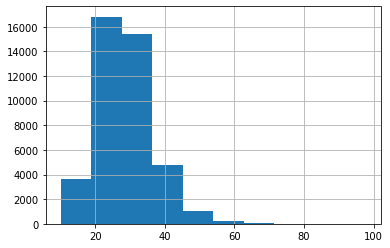

In [ ]:
df.bmi.hist()

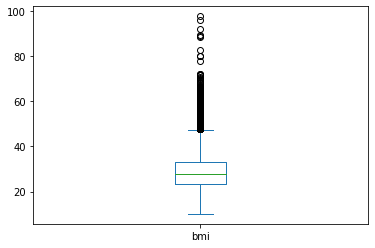

In [ ]:
df.bmi.plot.box()

In [ ]:
# testdf.shape

In [ ]:
# traindf.shape # note 'bmi' is missing

In [ ]:
# testdf.info()

In [ ]:
# transformed_df.info()

In [ ]:
# predBMIdf = transformed_df.copy()

In [ ]:
# transformed_df['id'] = transformed_df.index

In [ ]:
# transformed_df.drop('id', axis=1, inplace=True)

In [ ]:
# testdf['id'] = testdf.index

In [ ]:
# testdf.drop('id', axis=1, inplace=True)

In [ ]:
# predBMIdf = pd.merge(transformed_df, testdf, how='outer', on='id')
#                      #, how='left')#how='right')#  left_index=True, right_index=True)

In [ ]:
# transformed_df.shape

In [ ]:
# testdf.shape

In [ ]:
# strokeDF.shape

In [ ]:
# predBMIdf.shape

In [ ]:
# predBMIdf.info()

In [ ]:
# transformed_df.info()

In [ ]:
# 43400-41938

In [ ]:
# testdf.index

In [ ]:
# transformed_df.index

In [ ]:
# df.index

Welp, there's the [simple solution](https://stackoverflow.com/questions/29357379/pandas-fill-missing-values-in-dataframe-from-another-dataframe)! 🤦

In [ ]:
# bmiFill = transformed_df.copy()
# bmiFill.update(testdf)
# bmiFill.info()

In [ ]:
# transformed_df.info()

In [ ]:
round((43400-41938)/43400*100, 2)/20

0.1685

In [ ]:
# bmiAvg = transformed_df.copy()
# bmiAvg.bmi = bmiAvg.bmi.fillna(bmiAvg.bmi.mean())
# bmiAvg.info()

In [ ]:
def load_dataset(DF):
  # retrieve numpy array
  dataset = DF.values
  # split into input (X) and output (y) variables
  X, y = dataset[:, :-1], dataset[:,-1]
  # ensure inputs are floats and output is an integer label
  X = X.astype('float64')
  return X, y

In [ ]:
# # load the dataset
# X, y = load_dataset(bmiAvg)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=42)

# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(solver='liblinear')
# lr.fit(X_train, y_train)

# pred = lr.predict(X_test)
# from sklearn import metrics
# print(metrics.accuracy_score(pred, y_test))

In [ ]:
# # load the dataset
# X, y = load_dataset(bmiFill)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=42)

# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(solver='liblinear')
# lr.fit(X_train, y_train)

# pred = lr.predict(X_test)
# from sklearn import metrics
# print(metrics.accuracy_score(pred, y_test))

Weird. Identical results for both filling w/LogReg and filling w/mean.  
Ope, not weird ...imbalanced.

In [ ]:
# # load the dataset
# X, y = load_dataset(bmiAvg)

# # load the dataset
# X2, y2 = load_dataset(bmiFill)

In [ ]:
# sum(X==X2)

In [ ]:
# bmiAvg.equals(bmiFill)

In [ ]:
# for i in bmiAvg.columns:
#   print(f'{i}: {bmiAvg[i].equals(bmiFill[i])}')

## Look at data distribution

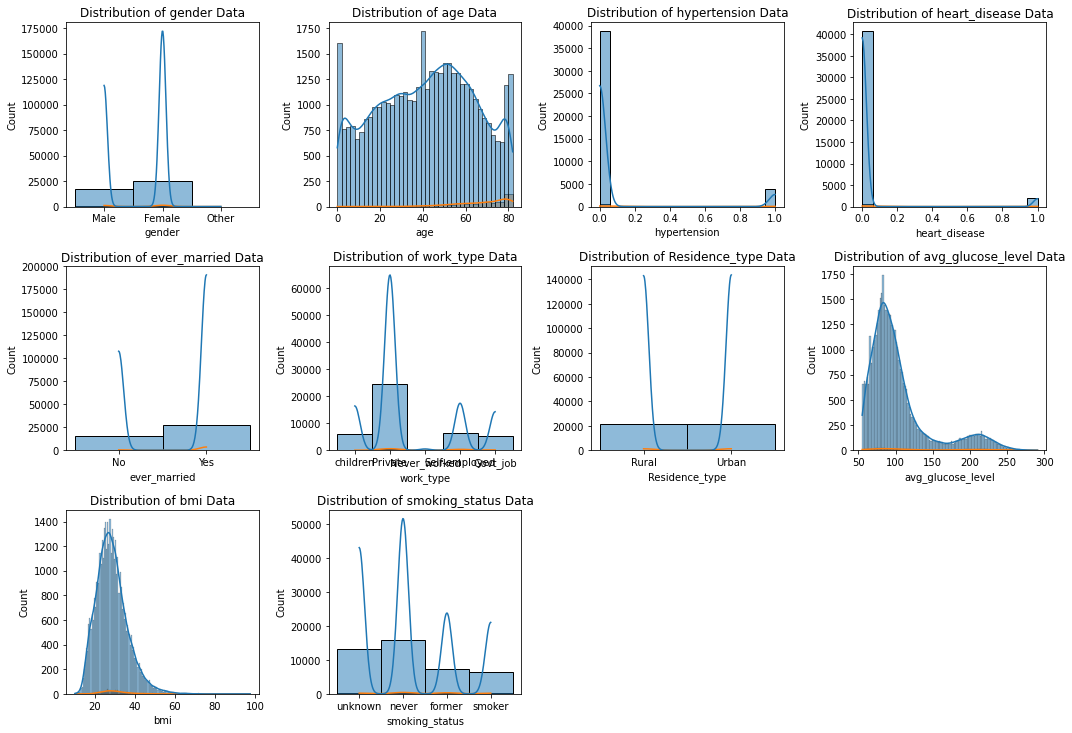

CPU times: user 11 s, sys: 700 ms, total: 11.7 s
Wall time: 17.5 s


In [ ]:
%%time
# Look at histograms by variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(strokeDF.columns[:-1], 1):
  plt.subplot(6, 4, i)
  plt.title(f'Distribution of {col} Data')
  sns.histplot(data=strokeDF, x=col, kde=True, hue='stroke', legend=False)
  plt.tight_layout()
  plt.plot()
plt.show()

### Things to fix:
* Remove 'Other' gender? Maybe not, idk
* Fix 'age' outliers: too many near 0; huge jump around 80?
* 'avg_glucose_level' and 'bmi' are skewed
* Huge imbalance in target variable 'stroke' (difficult to compare stroke vs non-stroke distributions)

Compare distribution using balanced dataset

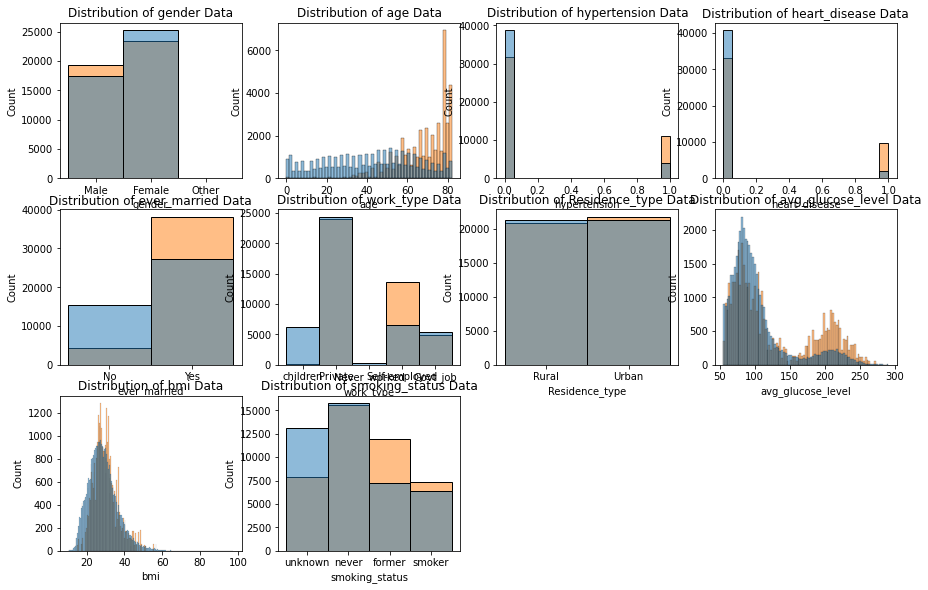

In [ ]:
# X, y = strokeDF.iloc[:,:-1], strokeDF.iloc[:,-1]
y = strokeDF.stroke

## BALANCE BASED ON TARGET (STROKE)
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
# fit and apply the transform
X, y = oversample.fit_resample(strokeDF, y)


# Look at histograms by variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(X.columns[:-1], 1):
  plt.subplot(6, 4, i)
  plt.title(f'Distribution of {col} Data')
  sns.histplot(data=X, x=col, kde=False, hue='stroke', legend=False)
  # plt.tight_layout()
  plt.plot()
plt.show()

Make `work_status` binary: 'self_employed' vs other?  
Remove `Residence_type`?  


In [ ]:
strokeDF.corrwith(strokeDF['stroke']).abs().sort_values(ascending=False)

stroke               1.000000
age                  0.156049
heart_disease        0.113763
avg_glucose_level    0.078917
hypertension         0.075332
bmi                  0.020285
dtype: float64

In [ ]:
# # df = strokeDF.copy()
# df = noYoung.copy()
# # encode Yes/No to 1/0
# df.ever_married.replace(['Yes', 'No'], [1, 0], inplace=True)

# # drop 'Other' from gender and encode to 1/0
# df.gender.replace(['Male', 'Female'], [1, 0], inplace=True)

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer

# transformer = make_column_transformer(
#     (OneHotEncoder(), ['work_type', 'Residence_type', 'smoking_status']), 
#     remainder='passthrough')

# transformed = transformer.fit_transform(df)
# df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out(), 
#                   index=df.index)

In [ ]:
strokeDF[strokeDF['work_type'] == 'children'].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,6156.000000,6156.000000,6156.000000,6156.000000,6060.000000,6156.000000
mean,6.699253,0.000325,0.000650,92.375713,19.924076,0.000325
std,4.507945,0.018023,0.025484,24.310400,4.816241,0.018023
min,0.080000,0.000000,0.000000,55.000000,10.300000,0.000000
25%,2.000000,0.000000,0.000000,75.857500,16.900000,0.000000
50%,6.000000,0.000000,0.000000,88.515000,18.800000,0.000000
75%,11.000000,0.000000,0.000000,104.165000,21.500000,0.000000
max,16.000000,1.000000,1.000000,243.840000,96.100000,1.000000


In [ ]:
# # Check correlation of imbalanced data
# df.corrwith(df['remainder__stroke']).sort_values(ascending=False)

In [ ]:
# # check correlation balanced data
# X.corrwith(X['stroke']).sort_values(ascending=False)

In [ ]:
# # X, y = strokeDF.iloc[:,:-1], strokeDF.iloc[:,-1]
# y = DF.stroke

# ## BALANCE BASED ON TARGET (STROKE)
# # define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
# # fit and apply the transform
# X, y = oversample.fit_resample(DF, y)

In [ ]:
# %%time
# # Look at histograms by variable
# plt.figure(figsize=(15, 20))
# for i, col in enumerate(X.columns[:-1], 1):
#   plt.subplot(6, 4, i)
#   plt.title(f'Distribution of {col} Data')
#   sns.histplot(data=X, x=col, kde=False, hue='stroke', legend=False)
#   # plt.tight_layout()
#   plt.plot()
# plt.show()

In [ ]:
# X.columns

In [ ]:
# X.corrwith(X['stroke'])
X.corrwith(X['stroke']).abs().sort_values(ascending=False)

stroke               1.000000
age                  0.590729
heart_disease        0.266613
avg_glucose_level    0.233074
hypertension         0.220504
bmi                  0.089381
dtype: float64

In [ ]:
strokeDF.work_type.unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [ ]:
strokeDF.gender.value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [ ]:
round(11/(len(strokeDF))*100, 2)

0.03

In [ ]:
strokeDF[strokeDF.gender=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,former,0
26188,Other,46.0,0,0,No,Private,Rural,83.28,NaN,never,0
52984,Other,27.0,0,0,No,Private,Urban,62.45,NaN,smoker,0
24893,Other,53.0,0,0,Yes,Private,Rural,89.65,NaN,unknown,0
13471,Other,39.0,0,0,Yes,Govt_job,Urban,95.59,32.0,former,0
31015,Other,19.0,0,0,No,Private,Rural,75.76,32.2,former,0
27043,Other,49.0,0,0,Yes,Private,Urban,94.88,37.2,never,0
51111,Other,51.0,0,0,Yes,Private,Rural,91.75,32.2,former,0
42452,Other,10.0,0,0,No,children,Rural,72.05,21.2,former,0


Okay, none of the 'Other' gender had a stroke and it's only 0.03% of the dataset, so I'm going to remove those 11 in the interest of reducing overall complexity. Maybe this is an ethical concern to consider.

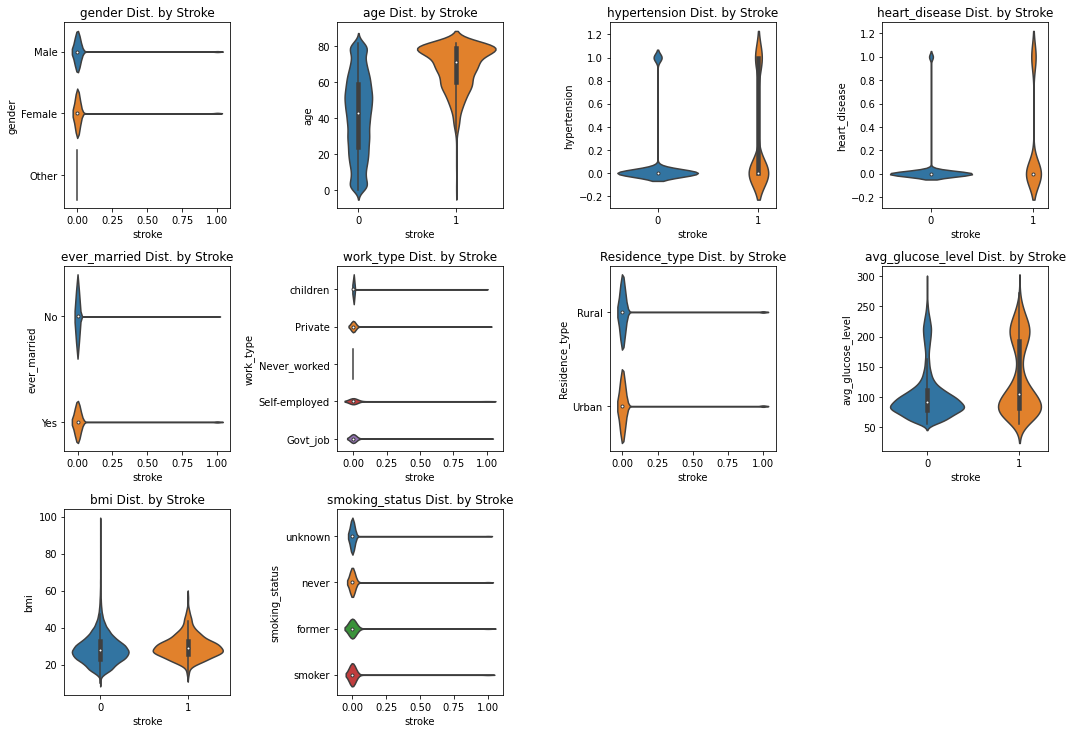

CPU times: user 5.69 s, sys: 839 ms, total: 6.53 s
Wall time: 7.24 s


In [ ]:
%%time
# Look at box plots by variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(strokeDF.columns[:-1], 1):
  plt.subplot(6, 4, i)
  plt.title(f'{col} Dist. by Stroke')
  sns.violinplot(y=strokeDF[col], x=strokeDF['stroke'])
  plt.tight_layout()
  plt.plot()
plt.show()

In [ ]:
strokeDF.stroke.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [ ]:
round(783/43400*100, 2)

1.8

In [ ]:
strokeDF.work_type.value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

Sigh, this explains the 98% accuracy from earlier.

## Balance target classes

In [ ]:
# def load_dataset(DF):
#   # retrieve numpy array
#   dataset = DF.values
#   # split into input (X) and output (y) variables
#   X, y = dataset[:, :-1], dataset[:,-1]
#   # ensure inputs are floats and output is an integer label
#   # X = X.astype('float64')
#   return X, y

In [ ]:
# df = strokeDF.copy()
# df.update(testdf)

In [ ]:
# # load the dataset
# X, y = load_dataset(df)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=42)

In [ ]:
# # random oversampling to balance the class distribution
# from collections import Counter

# # summarize class distribution
# print(Counter(y_train))

# # get an average class size
# balancedNum = int(round(len(y_train)/2, 0))
# balancedNum

In [ ]:
# df.info()

In [ ]:
# # summarize
# print('Train:', X_train.shape, y_train.shape)
# print('Test: ', X_test.shape, y_test.shape)

In [ ]:
# X_train

Apparently this just doesn't work with both strings *and* floats:

In [ ]:
# from imblearn.over_sampling import SMOTENC
# sm = SMOTENC(random_state=42, categorical_features=[0, 4, 5, 6, 9])
# X_res, y_res = sm.fit_resample(X_train, y_train.astype('int'))
# print(f'Resampled dataset samples per class {Counter(y_res)}')

In [ ]:
# # random oversampling to balance the class distribution
# from collections import Counter

# # summarize class distribution
# print(Counter(y_train))

# # get an average class size
# balancedNum = int(round(len(y_train)/10, 0))
# balancedNum

# # set up dictionary of classes to resample (< average number of samples)
# resampleDict = {}
# for i in np.unique(y_train):
#   if Counter(y_train)[i] < balancedNum:
#     resampleDict[i] = balancedNum

# ## Oversampling
# from imblearn.over_sampling import RandomOverSampler
# # define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy=resampleDict)
# # fit and apply the transform
# X_over, y_over = oversample.fit_resample(X_train, y_train)
# # summarize class distribution
# print(Counter(y_over))

# ## Undersampling
# from imblearn.under_sampling import RandomUnderSampler
# # define oversampling strategy
# undersample = RandomUnderSampler(sampling_strategy='auto')
# # fit and apply the transform
# # X_under, y_under = undersample.fit_resample(X_over, y_over)
# X_train, y_train = undersample.fit_resample(X_over, y_over)
# # summarize class distribution
# # print(Counter(y_under))
# print(Counter(y_train))

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# load the csv file as a data frame
# df = read_csv(url, header=None)
data = df.values
# split into input and output elements
X, y = df.iloc[:,:-1], df.iloc[:,-1]
# label encode the target variable
# y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
counter

Counter({0: 42617, 1: 783})

Class=0, n=42617 (98.196%)
Class=1, n=783 (1.804%)


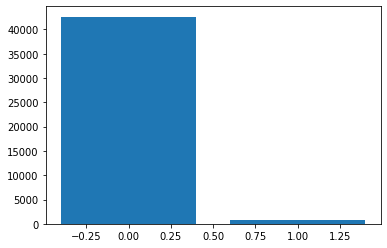

In [ ]:
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
# from imblearn.over_sampling import SMOTE
# # transform the dataset
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
# # summarize distribution
# counter = Counter(y)
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

Class=0, n=42617 (50.000%)
Class=1, n=42617 (50.000%)


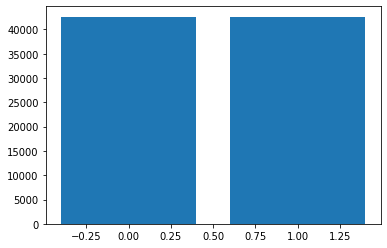

In [ ]:
counter = Counter(y_over)
counter

for k,v in counter.items():
	per = v / len(y_over) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

# Train/Test split

In [ ]:
strokeDF = strokeDF[strokeDF['gender'] != 'Other']

In [ ]:
df = strokeDF.copy()

In [ ]:
len(df)

43389

In [ ]:
# df.isna().sum()

In [ ]:
# df.loc[429]

## Encode categorical variables

In [ ]:
strokeDF.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df = strokeDF.copy()
# encode Yes/No to 1/0
df.ever_married.replace(['Yes', 'No'], [1, 0], inplace=True)

# drop 'Other' from gender and encode to 1/0
df.gender.replace(['Male', 'Female'], [1, 0], inplace=True)

# encode Urban/Rural to 1/0
df.Residence_type.replace(['Rural', 'Urban'], [1, 0], inplace=True)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['work_type', 'smoking_status']), 
    remainder='passthrough')

transformed = transformer.fit_transform(df)
df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out(), 
                  index=df.index)

For some reason this step is resetting my index...

In [ ]:
# df.head()

In [ ]:
# strokeDF.head()

Fixed!

In [ ]:
# df.loc[429]

In [ ]:
df.rename(columns={'remainder__bmi': 'bmi'}, inplace=True)

In [ ]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## impute `bmi` using LogReg

In [ ]:
df = strokeDF.copy()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# df = strokeDF.copy()
# df.drop('stroke', axis=1, inplace=True)
# df.head()
testdf = X_train[X_train['bmi'].isnull()==True]
traindf = X_train[X_train['bmi'].isnull()==False]
y_bmi = traindf['bmi']
traindf.drop("bmi",axis=1,inplace=True)
lr.fit(traindf,y_bmi)
testdf.drop("bmi",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['bmi'] = pred

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 18472 to 756
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   onehotencoder__work_type_Govt_job       956 non-null    float64
 1   onehotencoder__work_type_Never_worked   956 non-null    float64
 2   onehotencoder__work_type_Private        956 non-null    float64
 3   onehotencoder__work_type_Self-employed  956 non-null    float64
 4   onehotencoder__work_type_children       956 non-null    float64
 5   onehotencoder__smoking_status_former    956 non-null    float64
 6   onehotencoder__smoking_status_never     956 non-null    float64
 7   onehotencoder__smoking_status_smoker    956 non-null    float64
 8   onehotencoder__smoking_status_unknown   956 non-null    float64
 9   remainder__gender                       956 non-null    float64
 10  remainder__age                          956 non-null    fl

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43389 entries, 30669 to 36271
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43389 non-null  object 
 1   age                43389 non-null  float64
 2   hypertension       43389 non-null  int64  
 3   heart_disease      43389 non-null  int64  
 4   ever_married       43389 non-null  object 
 5   work_type          43389 non-null  object 
 6   Residence_type     43389 non-null  object 
 7   avg_glucose_level  43389 non-null  float64
 8   bmi                41931 non-null  float64
 9   smoking_status     43389 non-null  object 
 10  stroke             43389 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 4.0+ MB


In [ ]:
# X_train.update(testdf)

In [ ]:
# df.update(X_train)

In [ ]:
df.update(testdf)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43389 entries, 30669 to 36271
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43389 non-null  object 
 1   age                43389 non-null  float64
 2   hypertension       43389 non-null  int64  
 3   heart_disease      43389 non-null  int64  
 4   ever_married       43389 non-null  object 
 5   work_type          43389 non-null  object 
 6   Residence_type     43389 non-null  object 
 7   avg_glucose_level  43389 non-null  float64
 8   bmi                42887 non-null  float64
 9   smoking_status     43389 non-null  object 
 10  stroke             43389 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 4.0+ MB


In [ ]:
testdf = X_test[X_test['bmi'].isnull()==True]
testdf.drop("bmi",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['bmi'] = pred

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Why is the index different??

In [ ]:
# X_test.update(testdf)

In [ ]:
# df.update(X_test)

In [ ]:
df.update(testdf)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43389 entries, 30669 to 36271
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43389 non-null  object 
 1   age                43389 non-null  float64
 2   hypertension       43389 non-null  int64  
 3   heart_disease      43389 non-null  int64  
 4   ever_married       43389 non-null  object 
 5   work_type          43389 non-null  object 
 6   Residence_type     43389 non-null  object 
 7   avg_glucose_level  43389 non-null  float64
 8   bmi                43389 non-null  float64
 9   smoking_status     43389 non-null  object 
 10  stroke             43389 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 4.0+ MB


BMI filled using Logistic Regression:

In [ ]:
bmiLR = df.copy()
bmiLR.name = 'LogReg'

BMI filled using mean:

In [ ]:
bmiAvg = strokeDF.copy()
bmiAvg.bmi = bmiAvg.bmi.fillna(bmiAvg.bmi.mean())
bmiAvg.name = 'Mean'

BMI filled using median:

In [ ]:
bmiMed = strokeDF.copy()
bmiMed.bmi = bmiMed.bmi.fillna(bmiMed.bmi.median())
bmiMed.name = 'Median'

## Compare imputation methods

In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics

def compare_lr_accuracy(DF):
  ## ENCODE BINARY VALUES
  # encode Yes/No to 1/0
  DF.ever_married.replace(['Yes', 'No'], [1, 0], inplace=True)
  # encode gender to 1/0
  DF.gender.replace(['Male', 'Female'], [1, 0], inplace=True)
  # encode Urban/Rural to 1/0
  DF.Residence_type.replace(['Rural', 'Urban'], [1, 0], inplace=True)
  
  ## ONE HOT ENCODE CATEGORICAL VALUES
  # one hot encode remaining categorical variables
  transformer = make_column_transformer(
      (OneHotEncoder(), ['work_type', 'smoking_status']), 
      remainder='passthrough')
  transformed = transformer.fit_transform(DF)
  DF = pd.DataFrame(transformed, columns=transformer.get_feature_names_out(), 
                    index=DF.index) # fix index that was reset
  
  ## SEPARATE DATA FROM TARGET
  X, y = DF.iloc[:,:-1], DF.iloc[:,-1]

  ## SPLIT TRAINING AND TEST SETS
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
  
  ## BALANCE BASED ON TARGET (STROKE)
  # define oversampling strategy
  oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
  # fit and apply the transform
  X_over, y_over = oversample.fit_resample(X_train, y_train)

  ## SET UP AND FIT LOG REG MODEL
  lr = LogisticRegression(solver='liblinear')
  lr.fit(X_over, y_over)

  ## GENERATE PREDICTONS AND DISPLAY MODEL ACCURACY
  pred = lr.predict(X_test)
  score = metrics.accuracy_score(pred, y_test)
  print(f' Accuracy {round(score*100, 2)} %\n')

In [ ]:
methods = [bmiLR, bmiAvg, bmiMed]
for i in methods:
  print(f'Imputation Method: {i.name}')
  compare_lr_accuracy(i)

Imputation Method: LogReg
 Accuracy 74.13 %

Imputation Method: Mean
 Accuracy 74.22 %

Imputation Method: Median
 Accuracy 74.31 %



All pretty similar. Proceed with imputation using Median.

In [ ]:
strokeDF.age.max()

82.0

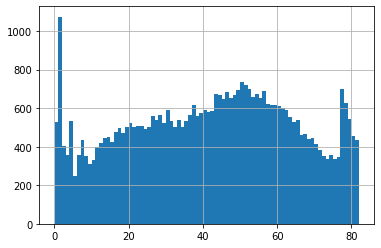

In [ ]:
strokeDF.age.hist(bins=82)

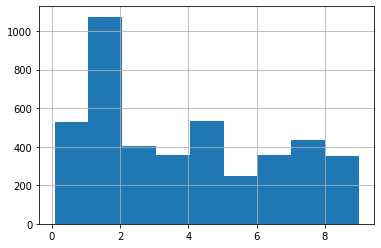

In [ ]:
strokeDF[strokeDF.age < 10].age.hist(bins=9)

In [ ]:
strokeDF[strokeDF.age <= 2]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,unknown,0
22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,unknown,0
5010,Female,2.00,0,0,No,children,Rural,92.48,18.0,unknown,0
45238,Female,1.80,0,0,No,children,Urban,58.26,16.5,unknown,0
61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
18634,Female,0.72,0,0,No,children,Urban,87.74,16.6,unknown,0
57592,Male,1.72,0,0,No,children,Urban,107.51,16.0,unknown,0
25684,Male,2.00,0,0,No,children,Rural,75.76,38.0,unknown,0


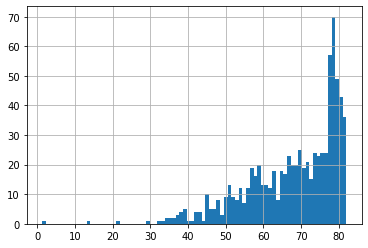

In [ ]:
strokeDF[strokeDF.stroke == 1].age.hist(bins=82)

In [ ]:
temp = strokeDF[strokeDF.stroke == 1]

In [ ]:
temp[temp.age < 30]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,unknown,1
49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,unknown,1
71866,Male,21.00,0,0,No,Private,Rural,67.42,25.7,never,1
38112,Male,29.00,0,0,Yes,Private,Rural,60.72,NaN,former,1


In [ ]:
len(temp[temp.age < 40])

24

In [ ]:
4/40000*100

0.01

In [ ]:
len(strokeDF[strokeDF.age < 30])

13706

In [ ]:
13706/(len(strokeDF))*100

31.588651501532645

## only > 30

Lets see if removing the under 30 crowd helps with accuracy:

In [ ]:
noYoung = strokeDF[strokeDF.age > 30]

In [ ]:
noYoung.bmi = noYoung.bmi.fillna(noYoung.bmi.median())

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
compare_lr_accuracy(noYoung)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


 Accuracy 70.96 %



Mild improvement there. I think I'll keep it

## Transform 'age', 'avg_glucose_level', and 'bmi'

In [ ]:
DF = noYoung.copy()

In [ ]:
  ## ENCODE BINARY VALUES
  # encode Yes/No to 1/0
  DF.ever_married.replace(['Yes', 'No'], [1, 0], inplace=True)
  # encode gender to 1/0
  DF.gender.replace(['Male', 'Female'], [1, 0], inplace=True)
  # encode Urban/Rural to 1/0
  DF.Residence_type.replace(['Rural', 'Urban'], [1, 0], inplace=True)
  
  ## ONE HOT ENCODE CATEGORICAL VALUES
  # one hot encode remaining categorical variables
  transformer = make_column_transformer(
      (OneHotEncoder(), ['work_type', 'smoking_status']), 
      remainder='passthrough')
  transformed = transformer.fit_transform(DF)
  DF = pd.DataFrame(transformed, columns=transformer.get_feature_names_out(), 
                    index=DF.index) # fix index that was reset

In [ ]:
# DF.columns

### Compare imputation methods

In [ ]:
# methods = [bmiLR, bmiAvg, bmiMed]
DF = bmiMed.copy()

In [ ]:
  ## ONE HOT ENCODE CATEGORICAL VALUES
  # one hot encode remaining categorical variables
  transformer = make_column_transformer(
      (OneHotEncoder(), ['work_type', 'smoking_status']), 
      remainder='passthrough')
  transformed = transformer.fit_transform(DF)
  DF = pd.DataFrame(transformed, columns=transformer.get_feature_names_out(), 
                    index=DF.index) # fix index that was reset

In [ ]:
rename_cols = {'remainder__gender': 'gender',
               'remainder__age': 'age', 
               'remainder__hypertension': 'hypertension',
               'remainder__heart_disease': 'heart_disease',
               'remainder__avg_glucose_level': 'avg_glucose_level',
               'remainder__bmi': 'bmi',
               'remainder__stroke': 'stroke'}

DF.rename(columns=rename_cols, inplace=True)

Note: No MinMax scaling required b/c all values are > 0:

In [ ]:
## SEPARATE DATA FROM TARGET
X, y = DF.iloc[:,:-1], DF.iloc[:,-1]

## SPLIT TRAINING AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.33, random_state=42)

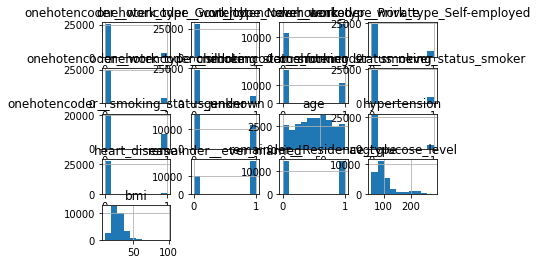

In [ ]:
# Look at distributions pre-transformation
# dataset = pd.DataFrame(df, columns=df.columns[:-1])
X_train.hist()
plt.show()

In [ ]:
# from sklearn.preprocessing import PowerTransformer
# power = PowerTransformer(method='box-cox')

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

## Transform features:

# define the pipeline
power = PowerTransformer(method='box-cox')
# scaler = MinMaxScaler(feature_range=(0, 1))
pipeline = Pipeline(steps=[('p', power)])

# # define the pipeline
# power = PowerTransformer(method='box-cox')
# scaler = MinMaxScaler(feature_range=(0, 1))
# pipeline = Pipeline(steps=[('p', power), ('s', scaler)])

# # data = pipeline.fit_transform(data)
# X_train.age = pipeline.fit_transform(X_train_raw)
# X_test = pipeline.transform(X_test_raw)

In [ ]:
cols_to_transform = ['age', 'avg_glucose_level', 'bmi']

for i in cols_to_transform:
  X_train[i] = pipeline.fit_transform(X_train[i].values.reshape(-1,1))
  X_test[i] = pipeline.transform(X_test[i].values.reshape(-1,1))

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# # scaler.fit_transform(X_train.values.reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# scaler.fit_transform(X_train.values.reshape(-1, 1))

In [ ]:
# X_train.columns

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import PowerTransformer

# ct = ColumnTransformer(
#     [("bc1", PowerTransformer(method='box-cox'), ['age']),
#      ("bc2", PowerTransformer(method='box-cox'), ['avg_glucose_level']),
#      ("bc3", PowerTransformer(method='box-cox'), ['bmi'])])

# temp = ct.fit_transform(X_train)

In [ ]:
# X_train.age = temp[:,0]
# X_train.avg_glucose_level = temp[:,1]
# X_train.bmi = temp[:,2]

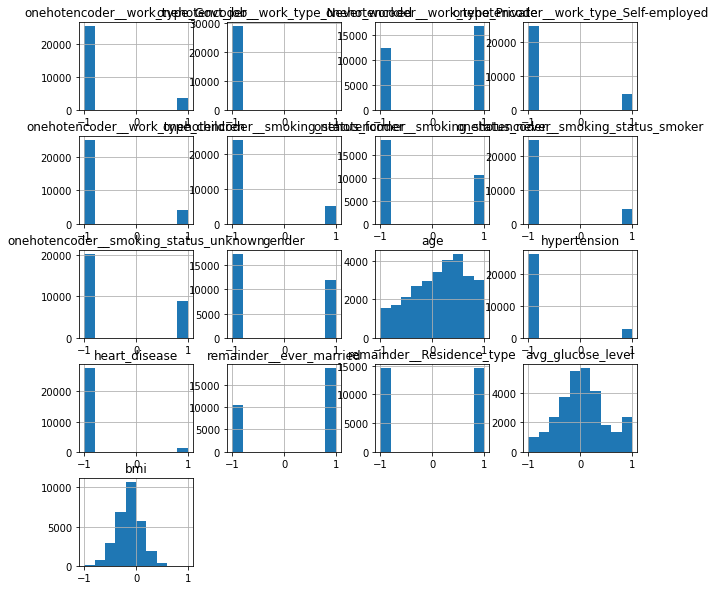

In [ ]:
# Look at distributions pre-transformation
dataset = pd.DataFrame(X_train, columns=DF.columns[:-1])
dataset.hist(figsize=(10,10))
plt.show()

Check accuracy w/scaled/transformed data

In [ ]:
  ## BALANCE BASED ON TARGET (STROKE)
  # define oversampling strategy
  oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
  # fit and apply the transform
  X_over, y_over = oversample.fit_resample(X_train, y_train)

  ## SET UP AND FIT LOG REG MODEL
  lr = LogisticRegression(solver='liblinear')
  lr.fit(X_over, y_over)

  ## GENERATE PREDICTONS AND DISPLAY MODEL ACCURACY
  pred = lr.predict(X_test)
  score = metrics.accuracy_score(pred, y_test)
  print(f' Accuracy {round(score*100, 2)} %\n')

 Accuracy 73.69 %



Hmm... 69.85% that's worse.Maybe rescaling isn't ideal for LogReg? Let me try -1 to 1 scaling  
69.59% but only those 3 were scaled -1 to 1. Lemme try all -1 to 1  
69.66% with all scaled -1 to 1
StandardScaler: 69.52%  

Ugh, maybe leave unscaled?

In [ ]:
len(X_train) + len(X_test)

43389

In [ ]:
y_test.sum()

251.0

# [Compare Classification Methods](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set up DataFrame to store comparisons
model_compare = pd.DataFrame()

def get_model_metrics(name, model):
  '''Prints confusion matrix and some metrics; returns metrics in a DF'''
  cols = ['Model', 'Accuracy', 'F1_Score', 'Precision', 'Recall']
    # get predictions
  predictions = model.predict(X_test)
  
  # print confusion matrix
  cm = confusion_matrix(y_test, predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                display_labels=model.classes_)
  print(cm)
  disp.plot()
  plt.show()
  
  # get accuracy, f1-score, precision, and recall
  accuracy = round(model.score(X_test, y_test)*100, 2)
  print('Accuracy: ', accuracy)
  cr = classification_report(y_test, predictions, output_dict=True)
  f1Score = round(cr['weighted avg']['f1-score'], 4)
  print('F1-Score: ', f1Score)
  precision = round(cr['weighted avg']['precision'], 4)
  print('Precision:', precision)
  recall = round(cr['weighted avg']['recall'], 4)
  print('Recall:   ', recall)

  df = pd.DataFrame([[name, accuracy, f1Score, precision, recall]],
                    columns=cols)
  return df

## Random Forest

In [ ]:
%%time
# Load libraries
from sklearn.ensemble import RandomForestClassifier

# Create classifier
rfClass = RandomForestClassifier()#class_weight='balanced')

# Train model
rfClass.fit(X_over, y_over)

CPU times: user 6.11 s, sys: 37.8 ms, total: 6.15 s
Wall time: 8.4 s


[[14046    22]
 [  247     4]]


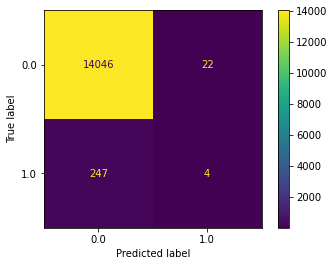

Accuracy:  98.12
F1-Score:  0.9737
Precision: 0.9682
Recall:    0.9812


In [ ]:
# Evaluate model
tempDF = get_model_metrics('RandomForest', rfClass)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## Decision Tree

In [ ]:
%%time
# Load libraries
from sklearn.tree import DecisionTreeClassifier

# Create decision tree regressor object
decisiontree = DecisionTreeClassifier()#class_weight='balanced')

# Train model
decisiontree.fit(X_over, y_over)

CPU times: user 186 ms, sys: 0 ns, total: 186 ms
Wall time: 186 ms


[[13848   220]
 [  238    13]]


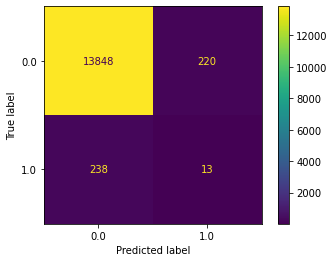

Accuracy:  96.8
F1-Score:  0.9674
Precision: 0.9668
Recall:    0.968


In [ ]:
# Evaluate model
tempDF = get_model_metrics('DecisionTree', decisiontree)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## Logistic Regression

In [ ]:
%%time
# Load libraries
from sklearn.linear_model import LogisticRegression

# Create logistic regression
logit = LogisticRegression()

# Train model
logit.fit(X_over, y_over)

CPU times: user 605 ms, sys: 370 ms, total: 975 ms
Wall time: 509 ms


[[10349  3719]
 [   48   203]]


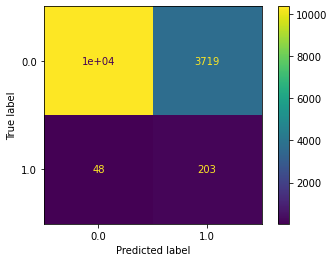

Accuracy:  73.69
F1-Score:  0.8329
Precision: 0.9788
Recall:    0.7369


In [ ]:
# Evaluate model
tempDF = get_model_metrics('LogReg', logit)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## Gaussian Naive Bayes Classifier

In [ ]:
%%time
# Load libraries
from sklearn.naive_bayes import GaussianNB

# Create Gaussian naive Bayes object
nBayes = GaussianNB()

# Fit model
nBayes.fit(X_over, y_over)

CPU times: user 25.3 ms, sys: 11 µs, total: 25.3 ms
Wall time: 27.2 ms


[[ 3837 10231]
 [    2   249]]


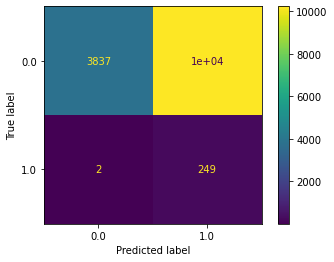

Accuracy:  28.54
F1-Score:  0.4218
Precision: 0.9824
Recall:    0.2854


In [ ]:
# Evaluate model
tempDF = get_model_metrics('GaussianNB', nBayes)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## Support Vector Classifier (SVC)

In [ ]:
%%time
# Load libraries
from sklearn.svm import SVC

# Create classification model
svc = SVC()#class_weight='balanced')

# Fit model
svc.fit(X_over, y_over)

CPU times: user 2min 7s, sys: 467 ms, total: 2min 7s
Wall time: 2min 7s


[[10670  3398]
 [   60   191]]


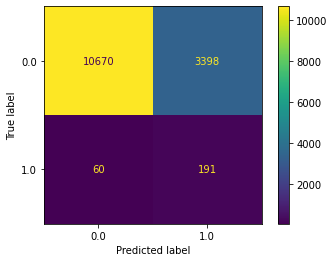

Accuracy:  75.85
F1-Score:  0.8472
Precision: 0.9779
Recall:    0.7585


In [ ]:
# Evaluate model
tempDF = get_model_metrics('SVC', svc)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## Linear SVC

In [ ]:
%%time
# Load libraries
from sklearn.svm import LinearSVC

# Create classification model
linSVC = LinearSVC()#class_weight='balanced')

# Fit model
linSVC.fit(X_over, y_over)

CPU times: user 8.26 s, sys: 8.65 ms, total: 8.27 s
Wall time: 8.27 s


[[10247  3821]
 [   48   203]]


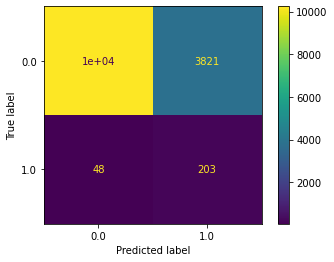

Accuracy:  72.98
F1-Score:  0.8281
Precision: 0.9788
Recall:    0.7298


In [ ]:
# Evaluate model
tempDF = get_model_metrics('LinearSVC', linSVC)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## Ada Boost Classifier

In [ ]:
%%time
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create classifier
adaboost = AdaBoostClassifier()

# Train model
adaboost.fit(X_over, y_over)

CPU times: user 2.16 s, sys: 48 ms, total: 2.2 s
Wall time: 2.17 s


[[10719  3349]
 [   52   199]]


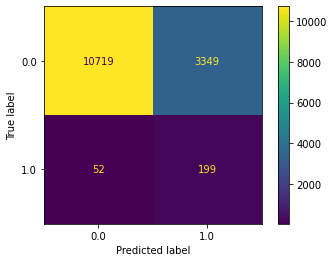

Accuracy:  76.25
F1-Score:  0.8498
Precision: 0.9787
Recall:    0.7625


In [ ]:
# Evaluate model
tempDF = get_model_metrics('AdaBoost', adaboost)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## MLP Classifier

In [ ]:
%%time
# Load libraries
from sklearn.neural_network import MLPClassifier

# Create classification model
mlp = MLPClassifier(early_stopping=True)

# Fit model
mlp.fit(X_over, y_over)

CPU times: user 33.4 s, sys: 24.2 s, total: 57.7 s
Wall time: 29.6 s


[[11623  2445]
 [  110   141]]


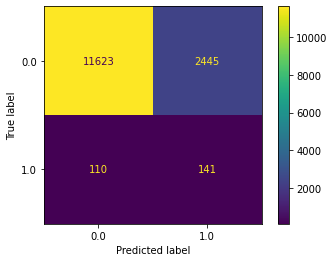

Accuracy:  82.16
F1-Score:  0.8869
Precision: 0.9742
Recall:    0.8216


In [ ]:
# Evaluate model
tempDF = get_model_metrics('MLP', mlp)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## Gradient Boosting Classifier

In [ ]:
%%time
# Load libraries
from sklearn.ensemble import GradientBoostingClassifier

# Create classification model
gbc = GradientBoostingClassifier()

# Fit model
gbc.fit(X_over, y_over)

CPU times: user 7.63 s, sys: 68.7 ms, total: 7.7 s
Wall time: 8.37 s


[[11071  2997]
 [   57   194]]


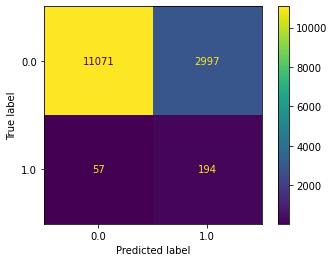

Accuracy:  78.67
F1-Score:  0.8654
Precision: 0.9785
Recall:    0.7867


In [ ]:
# Evaluate model
tempDF = get_model_metrics('GBC', gbc)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## K-Nearest Neighbor

In [ ]:
%%time
# Load libraries
from sklearn.neighbors import KNeighborsClassifier

# Create classification model
knn = KNeighborsClassifier(2)

# Fit model
knn.fit(X_over, y_over)

CPU times: user 7.56 ms, sys: 0 ns, total: 7.56 ms
Wall time: 10.6 ms


[[13863   205]
 [  235    16]]


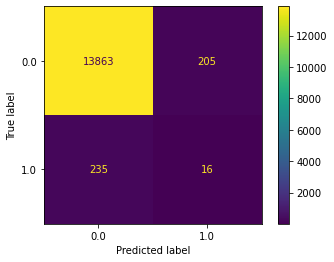

Accuracy:  96.93
F1-Score:  0.9683
Precision: 0.9674
Recall:    0.9693


In [ ]:
# Evaluate model
tempDF = get_model_metrics('KNN', knn)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## Stochastic Gradient Descent

In [ ]:
%%time
# Load libraries
from sklearn.linear_model import SGDClassifier

# Create classification model
sgd = SGDClassifier()

# Fit model
sgd.fit(X_over, y_over)

CPU times: user 178 ms, sys: 88 µs, total: 179 ms
Wall time: 179 ms


[[10516  3552]
 [   56   195]]


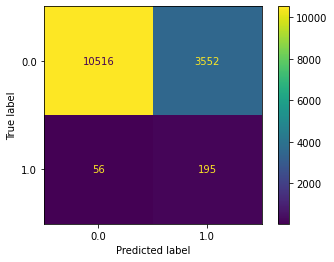

Accuracy:  74.8
F1-Score:  0.8403
Precision: 0.9782
Recall:    0.748


In [ ]:
# Evaluate model
tempDF = get_model_metrics('SGD', sgd)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## LGBM Classifier

In [ ]:
%%time
# Load libraries
from lightgbm import LGBMClassifier

# Create classification model
lgbm = LGBMClassifier()

# Fit model
lgbm.fit(X_over, y_over)

CPU times: user 1.63 s, sys: 65.2 ms, total: 1.69 s
Wall time: 931 ms


[[12438  1630]
 [  129   122]]


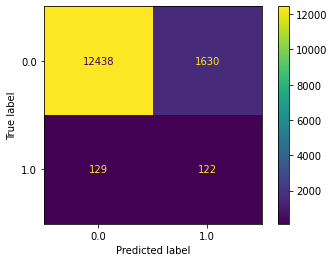

Accuracy:  87.72
F1-Score:  0.9197
Precision: 0.9736
Recall:    0.8772


In [ ]:
# Evaluate model
tempDF = get_model_metrics('LGBM', lgbm)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## XGBoost Classifier

In [ ]:
%%time
# Load libraries
from xgboost.sklearn import XGBClassifier

# Create classification model
xgbc = XGBClassifier()

# Fit model
xgbc.fit(X_over, y_over)

CPU times: user 3.48 s, sys: 21.5 ms, total: 3.51 s
Wall time: 3.62 s


[[10963  3105]
 [   56   195]]


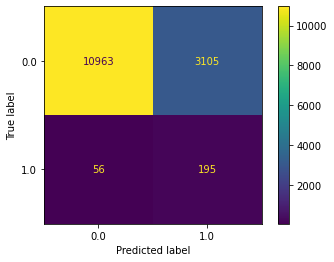

Accuracy:  77.92
F1-Score:  0.8606
Precision: 0.9785
Recall:    0.7792


In [ ]:
# Evaluate model
tempDF = get_model_metrics('XGBC', xgbc)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## Linear Discriminant Analysis

In [ ]:
%%time
# Load libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create classification model
lda = LinearDiscriminantAnalysis()

# Fit model
lda.fit(X_over, y_over)

CPU times: user 157 ms, sys: 8.78 ms, total: 166 ms
Wall time: 153 ms


[[10198  3870]
 [   48   203]]


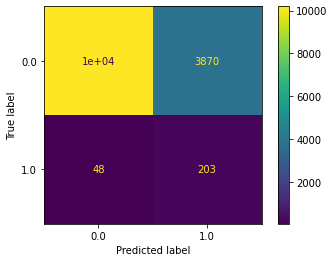

Accuracy:  72.64
F1-Score:  0.8258
Precision: 0.9787
Recall:    0.7264


In [ ]:
# Evaluate model
tempDF = get_model_metrics('LDA', lda)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

## Compare Model Performance

In [ ]:
model_compare.sort_values('Accuracy', ascending=False, ignore_index=True)

,Model,Accuracy,F1_Score,Precision,Recall
0,RandomForest,98.12,0.9737,0.9682,0.9812
1,KNN,96.93,0.9683,0.9674,0.9693
2,DecisionTree,96.80,0.9674,0.9668,0.9680
3,LGBM,87.72,0.9197,0.9736,0.8772
4,MLP,82.16,0.8869,0.9742,0.8216
5,GBC,78.67,0.8654,0.9785,0.7867
6,XGBC,77.92,0.8606,0.9785,0.7792
7,AdaBoost,76.25,0.8498,0.9787,0.7625
8,SVC,75.85,0.8472,0.9779,0.7585
9,SGD,74.80,0.8403,0.9782,0.7480


In [ ]:
y_test.sum()

251.0

In [ ]:
len(y_test)

14319

# Hyperparameter Tuning

In [ ]:
np.arange(10, 15)

array([10, 11, 12, 13, 14])

In [ ]:
import itertools

In [ ]:
[x for x in itertools.product((30,100),repeat=3)]

[(30, 30, 30),
 (30, 30, 100),
 (30, 100, 30),
 (30, 100, 100),
 (100, 30, 30),
 (100, 30, 100),
 (100, 100, 30),
 (100, 100, 100)]

In [ ]:
1e-4

0.0001

In [ ]:
8*4*3*3*3*3

2592

In [ ]:
2592/60

43.2